In [10]:
%matplotlib inline
import os
import sys
import wkbl
import glob
import pymc
import lmfit
import cfalcon
import numpy as np
import ConfigParser
from py_unsio import *
import matplotlib as mpl
from numpy import exp, sqrt
import matplotlib.pyplot as plt
from scipy.special  import  gamma
from scipy.integrate  import  quad
from scipy.optimize import curve_fit
from sklearn.neighbors import KDTree
from scipy.stats import rv_continuous
from pymodelfit import FunctionModel1DAuto
import pynbody
import wkbl
import wkbl.astro.nbody_essentials as nbe
import warnings
import seaborn as sbe
warnings.filterwarnings('ignore')
CF =cfalcon.CFalcon()


In [2]:
path ='/data/MIB/anunez/NewSchool/Mochima/rerun_box_4zoom_mochima_halo5_hydro_SF_LR/output_00041'
path ='/data/Mochima3/rerun/output_00041'
myhalo = wkbl.Galaxy_Hound(path,"halo")

loading Dark matter..


In [3]:
myhalo.r_virial(600,rotate=False)


In [4]:
print len(myhalo.dm.pos3d)

4103184


In [5]:
myhalo.redefine(2)

In [6]:
print len(myhalo.dm.pos3d),myhalo.dm._dens

684201 False


In [7]:
x, y = myhalo.dm.density_profile(60,myhalo.r200)

| Beware of the center you are considering for the Dark Matter halo here,
| depending on the center Cusp could turn into Core or viceversa 
| check nbody_essentials.real_center


In [8]:
print len(myhalo.dm.pos3d),myhalo.dm._dens,len(myhalo.dm.rho)

684201 True 684201


684201 684201


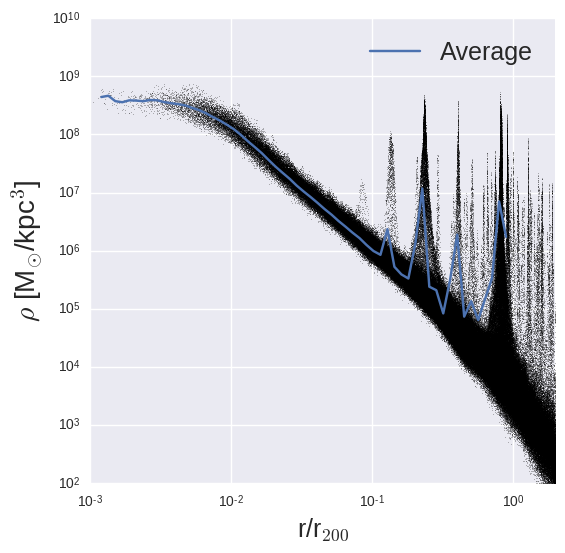

In [18]:
fig, ax = plt.subplots(figsize=[6,6])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-3,2])
ax.set_ylim([1e2,1e10])
ax.set_ylabel(r'$\rho$ [M$_{\odot}$/kpc$^3$]',fontsize=20)
ax.set_xlabel(r'r/r$_{200}$',fontsize=18)
print len(myhalo.dm.r),len(myhalo.dm.rho)
ax.plot(x[:-1],y,label="Average")
ax.scatter(myhalo.dm.r/ myhalo.r200 , myhalo.dm.rho, c='k', s=0.1, lw=0)
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=18)

In [4]:
myhalo.redefine(1.)

In [5]:
nupos = myhalo.dm.pos3d#[np.where(myhalo.dm.r<myhalo.r200)]
numass = myhalo.dm.mass#[np.where(myhalo.dm.r<myhalo.r200)]

In [15]:
C = myhalo.dm.Clumps
C_pos = C.pos3d[np.argsort(C.mass)][0:-3]
C_mass = C.mass[np.argsort(C.mass)][0:-3]

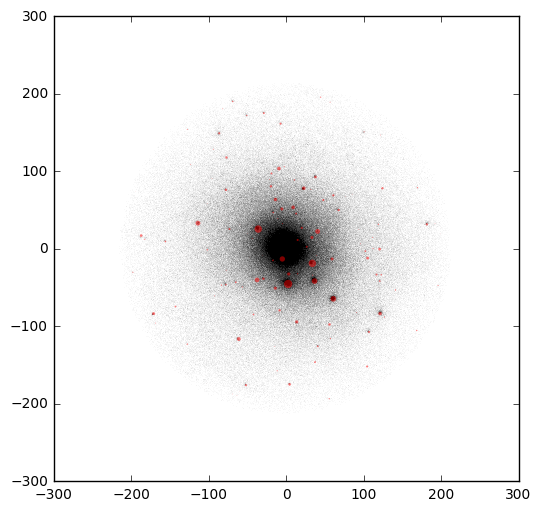

In [19]:
fig, ax =  plt.subplots(figsize=[6,6])

ax.scatter(nupos[:,0],nupos[:,1],s=0.01,c='k',alpha=0.7,lw=0 )
ax.scatter(C_pos[:,0],C_pos[:,1],
           alpha=0.5,s=700 * C_mass / np.max(C.mass),
           c='r',lw=0)

In [31]:
c_r = np.sqrt((C_pos[:,0]**2) + (C_pos[:,1]**2) + (C_pos[:,2]**2))
r = np.sqrt((myhalo.dm.pos3d[:,0]**2) + (myhalo.dm.pos3d[:,1]**2) + (myhalo.dm.pos3d[:,2]**2))
m_prim = []
for i in c_r:
    m_prim.append(np.sum(myhalo.dm.mass[(r < i)]) / (4. * np.pi * (i**3) / 3.))

m_prim = np.array(m_prim)
#rho_local =  np.sum(myhalo.dm.mass[(r < c_r)]) / (4. * np.pi * (c_r**3) / 3.)

In [32]:
virs = np.array([])
c_c = C_pos
for i in range(len(c_c)):
    r_min= 0
    r_tmp = np.sqrt((nupos[:,0]-c_c[i,0])**2 + (nupos[:,1]-c_c[i,1])**2 +(nupos[:,2]-c_c[i,2])**2)
    r = r_tmp[np.argsort(r_tmp)]
    mass = numass[np.argsort(r_tmp)]
    rho_local = 2 * m_prim[i]
    j = np.where(r>r_min)[0][0]
    if r_min==0:
        msu = 0
    else:
        msu = np.sum(mass_sorted[j-1])
    try:
        while rho_local >  m_prim[i]:
            msu += mass[j]
            rho_local =  (3. /4. / np.pi) * msu / (r[j]**3)
            j+=1
    except:
        print "virial radius did not converged "
        sys.exit()
    virs = np.append(virs,r[j])



In [33]:
print C.pos3d[2,2]

-202.845562428


In [34]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xscale('log')
ax.scatter(C_mass, virs)

In [36]:
fig, ax =  plt.subplots(figsize=[6,6])
l=102
ax.scatter(nupos[:,1],nupos[:,2],s=0.01,c='k',alpha=0.7,lw=0 )

for k in range(len(virs)):
    circle = plt.Circle((C_pos[k,1],C_pos[k,2]),
                    virs[k],color='r',lw=1, alpha=.1)
    ax.add_patch( circle )